# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
from math import pi as PI
from IPython.display import display

# Lesson 1

## Practice 1

In [2]:
def appendlist(a, b): # appends cells of b into a
    a += b

def delmatch(a,b): # using del, remove cells in a if matching b
    for i in range(len(a) - 1, -1, -1):  # Iterate backwards to avoid index shifting issues
        if a[i] in b:
            del a[i]

x = [100,200]
y = [300,400]

print(x)
print(y)

combi = []

combi += x
combi += y

print(combi)

delmatch(combi,x)
delmatch(combi,y)

print(combi)



[100, 200]
[300, 400]
[100, 200, 300, 400]
[]


## Practice 2

In [3]:
product_list = [['prodA', 'S1234', 12], ['prodB ', 'S4567', 22], ['prodC ', 'S9999', 18], ['prodD', 'S9999', 35]]

for i in product_list:
    print(i[0])



prodA
prodB 
prodC 
prodD


## Practice 3 & 4

In [4]:
data = [15, 6, 1, 2, 7, 10, 25, 2, 6, 4, 1]

datasqr = []

for i in data:
    datasqr.append(i ** 2)

print(datasqr)

sumsqr = 0

for i in datasqr:
    sumsqr += i

print(f"{sumsqr / len(datasqr):.3f}")



[225, 36, 1, 4, 49, 100, 625, 4, 36, 16, 1]
99.727


## Practice 5

In [5]:
data = [2, -10, 12, -9, 75, 0, -12]

dataPositive = []

for i in data:
    if(i > 0):
        dataPositive.append(i)

print(dataPositive)



[2, 12, 75]


## Practice 6

In [6]:
def pythSqr(a,b):
    return (a ** 2) + (b ** 2)

def pythSqrt(a,b):
    return (a ** 0.5) + (b ** 0.5)

a = 10
b = 5

print(f"{pythSqr(a,b)} and {pythSqrt(a,b):.3f}")



125 and 5.398


# Lesson 2

## Practice 1

In [7]:
data = pd.Series([1.5, 2.5, 0.75, 3.5],index = ['100', '200', '300', '400'])

display(data)

100    1.50
200    2.50
300    0.75
400    3.50
dtype: float64

In [8]:
display(data['200'])

2.5

In [9]:
data['500'] = 4.5
display(data)

100    1.50
200    2.50
300    0.75
400    3.50
500    4.50
dtype: float64

In [10]:
display(data['200':'400'])

200    2.50
300    0.75
400    3.50
dtype: float64

In [11]:
display(data[(data > 2) & (data <= 3.5)])

200    2.5
400    3.5
dtype: float64

In [12]:
del data['200']

display(data)

100    1.50
300    0.75
400    3.50
500    4.50
dtype: float64

## Practice 2

In [13]:
df = pd.DataFrame({'Name':['Product A', 'Product B', 'Product C'], 
                  'Produced_Qty':[523967, 795662, 341297], 
                  'Passed_Qty':[499768, 756662, 301297]})

display(df)

,Name,Produced_Qty,Passed_Qty
0,Product A,523967,499768
1,Product B,795662,756662
2,Product C,341297,301297


In [14]:
display(df['Produced_Qty'])

0    523967
1    795662
2    341297
Name: Produced_Qty, dtype: int64

In [15]:
df = pd.concat([df, pd.DataFrame({'Name':['Product D', 'Product E'], 
                  'Produced_Qty':[457892, 671123], 
                  'Passed_Qty':[417765, 651111]})], ignore_index = True)
# dfta = pd.DataFrame(data)

# pd.concat([df, dfta])
display(df)

,Name,Produced_Qty,Passed_Qty
0,Product A,523967,499768
1,Product B,795662,756662
2,Product C,341297,301297
3,Product D,457892,417765
4,Product E,671123,651111


In [16]:
df['Failed_Qty'] = df['Produced_Qty'] - df['Passed_Qty']

display(df)

,Name,Produced_Qty,Passed_Qty,Failed_Qty
0,Product A,523967,499768,24199
1,Product B,795662,756662,39000
2,Product C,341297,301297,40000
3,Product D,457892,417765,40127
4,Product E,671123,651111,20012


In [17]:
df['Failed_Rate'] = df['Failed_Qty'] / df['Produced_Qty']

display(df)

,Name,Produced_Qty,Passed_Qty,Failed_Qty,Failed_Rate
0,Product A,523967,499768,24199,0.046184
1,Product B,795662,756662,39000,0.049016
2,Product C,341297,301297,40000,0.117200
3,Product D,457892,417765,40127,0.087634
4,Product E,671123,651111,20012,0.029819


In [18]:
display(df[df['Failed_Rate'] > 0.1])

,Name,Produced_Qty,Passed_Qty,Failed_Qty,Failed_Rate
2,Product C,341297,301297,40000,0.1172


In [19]:
df.loc[df['Name'] == 'Product A', 'Passed_Qty'] = 512367

df['Failed_Qty'] = df['Produced_Qty'] - df['Passed_Qty']
df['Failed_Rate'] = df['Failed_Qty'] / df['Produced_Qty']

display(df)

,Name,Produced_Qty,Passed_Qty,Failed_Qty,Failed_Rate
0,Product A,523967,512367,11600,0.022139
1,Product B,795662,756662,39000,0.049016
2,Product C,341297,301297,40000,0.117200
3,Product D,457892,417765,40127,0.087634
4,Product E,671123,651111,20012,0.029819


In [20]:
df.drop(df[df['Name'] == 'Product B'].index, inplace = True)

display(df)

,Name,Produced_Qty,Passed_Qty,Failed_Qty,Failed_Rate
0,Product A,523967,512367,11600,0.022139
2,Product C,341297,301297,40000,0.117200
3,Product D,457892,417765,40127,0.087634
4,Product E,671123,651111,20012,0.029819


## Practice 3

In [21]:
df1 = pd.DataFrame({'Week':['Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6'], 
                   'Produced Qty':[533967.0, 565662.0, np.nan,557892.0, 571123.0, 561123.0],
                   'Passed Qty':[529768.0, np.nan,501297.0, 517765.0, 551111.0, 551111.0]})

display(df1)

df2 = pd.DataFrame({'Week':['Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6'],
                   'Machine':['Stamping'] * 6,
                   'Supervisor':['John', 'Wilson', 'John', 'William', 'Wilson', 'William']})

display(df2)

,Week,Produced Qty,Passed Qty
0,Week1,533967.0,529768.0
1,Week2,565662.0,NaN
2,Week3,NaN,501297.0
3,Week4,557892.0,517765.0
4,Week5,571123.0,551111.0
5,Week6,561123.0,551111.0


,Week,Machine,Supervisor
0,Week1,Stamping,John
1,Week2,Stamping,Wilson
2,Week3,Stamping,John
3,Week4,Stamping,William
4,Week5,Stamping,Wilson
5,Week6,Stamping,William


In [22]:
for col in df1.columns[1:]:
    df1[col] = df1[col].fillna(df1[col].mean())

# df1['Produced Qty'] = df1['Produced Qty'].fillna(df1['Produced Qty'].mean())
# df1['Passed Qty'] = df1['Passed Qty'].fillna(df1['Passed Qty'].mean())

display(df1)

,Week,Produced Qty,Passed Qty
0,Week1,533967.0,529768.0
1,Week2,565662.0,530210.4
2,Week3,557953.4,501297.0
3,Week4,557892.0,517765.0
4,Week5,571123.0,551111.0
5,Week6,561123.0,551111.0


In [23]:
df = pd.merge(df1, df2, on = 'Week')

display(df)

,Week,Produced Qty,Passed Qty,Machine,Supervisor
0,Week1,533967.0,529768.0,Stamping,John
1,Week2,565662.0,530210.4,Stamping,Wilson
2,Week3,557953.4,501297.0,Stamping,John
3,Week4,557892.0,517765.0,Stamping,William
4,Week5,571123.0,551111.0,Stamping,Wilson
5,Week6,561123.0,551111.0,Stamping,William


In [24]:
df['Passed Rate'] = df['Passed Qty'] / df['Produced Qty']

display(df)

,Week,Produced Qty,Passed Qty,Machine,Supervisor,Passed Rate
0,Week1,533967.0,529768.0,Stamping,John,0.992136
1,Week2,565662.0,530210.4,Stamping,Wilson,0.937327
2,Week3,557953.4,501297.0,Stamping,John,0.898457
3,Week4,557892.0,517765.0,Stamping,William,0.928074
4,Week5,571123.0,551111.0,Stamping,Wilson,0.964960
5,Week6,561123.0,551111.0,Stamping,William,0.982157


In [25]:
df_sup_PR = df.groupby('Supervisor').agg({'Passed Rate':'mean'})

display(df_sup_PR)

,Passed Rate
Supervisor,
John,0.945296
William,0.955116
Wilson,0.951144


In [26]:
df_sup_TPQ = df.groupby('Supervisor').agg({'Produced Qty':'sum'})

dax = df.groupby('Supervisor')['Produced Qty'].sum().to_frame()

display (dax)

display(df_sup_TPQ)

,Produced Qty
Supervisor,
John,1091920.4
William,1119015.0
Wilson,1136785.0


,Produced Qty
Supervisor,
John,1091920.4
William,1119015.0
Wilson,1136785.0


In [27]:
df_sup_TPQ.sort_values(by = 'Produced Qty', ascending = False, inplace = True)
df_sup_PR.sort_values(by = 'Passed Rate', ascending = False, inplace = True)

display(df_sup_TPQ)
display(df_sup_PR)

,Produced Qty
Supervisor,
Wilson,1136785.0
William,1119015.0
John,1091920.4


,Passed Rate
Supervisor,
William,0.955116
Wilson,0.951144
John,0.945296


# Lesson 3

## Practice 1

In [28]:
# set 1000 array from 0 to 10
x = np.linspace(0, 10, 1000)

<Figure size 500x500 with 0 Axes>

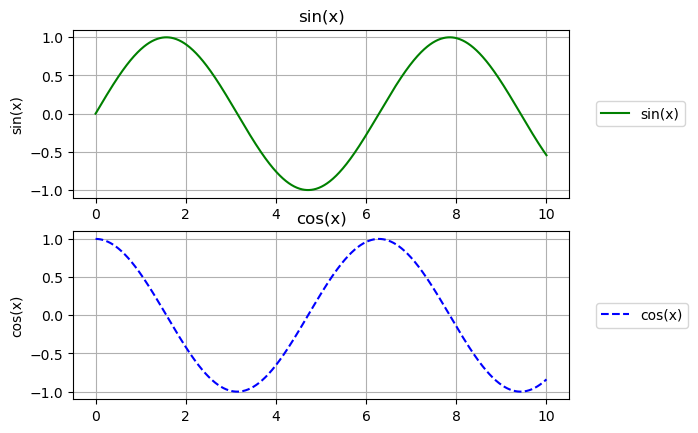

In [29]:
plt.figure(figsize = (5, 5))
fig, axes = plt.subplots(2)

axes[0].plot(x, np.sin(x), label = 'sin(x)', color = 'green')
axes[0].title.set_text ('sin(x)')
axes[0].set(ylabel = 'sin(x)')
axes[0].grid(True)
axes[0].legend(bbox_to_anchor = (1.04, 0.5), loc = 'center left')

axes[1].plot(x, np.cos(x), label = 'cos(x)', linestyle = '--', color = 'blue')
axes[1].title.set_text ('cos(x)')
axes[1].set(ylabel = 'cos(x)')
axes[1].grid(True)
axes[1].legend(bbox_to_anchor = (1.04, 0.5), loc = 'center left')

plt.show()

## Practice 2

In [30]:
df_raw = pd.read_csv('lesson3_data.csv')
df = df_raw

machines = df.columns[1:]

display(machines)

display(df)

Index(['Machine 1', 'Machine 2', 'Machine 3'], dtype='object')

,Customer,Machine 1,Machine 2,Machine 3
0,Customer 1,33,44,46
1,Customer 2,55,61,65
2,Customer 3,72,80,83
3,Customer 4,62,90,95
4,Customer 5,49,84,88
5,Customer 6,55,58,60


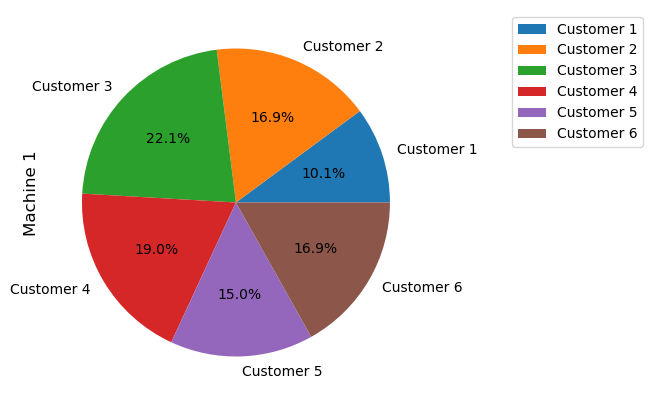

In [31]:
plt.figure(figsize = (5, 5))

plt.pie(df['Machine 1'], labels = df['Customer'], autopct = "%1.1f%%")

plt.title('Machine 1', rotation = 90, ha = 'left', y = 0.4, x = -0.05)
plt.legend(bbox_to_anchor = (1.2, 1))
plt.show()

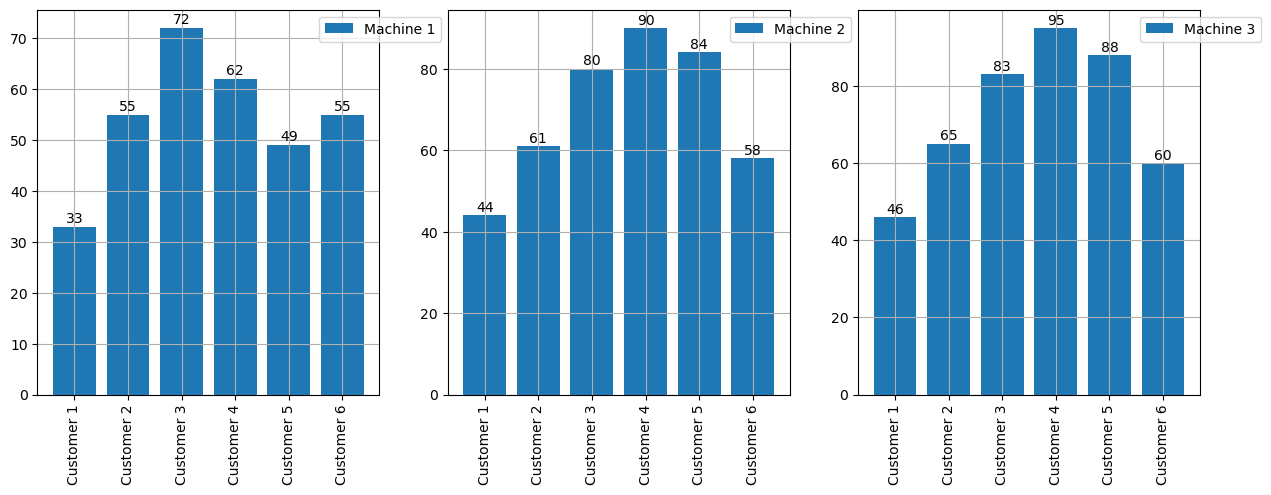

In [40]:
fig, axes = plt.subplots(1, len(machines), figsize = (15, 5))

for ax, machine in zip(axes, machines):
    bars = ax.bar(df['Customer'], df[machine], label = machine)
    for bar in bars:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height() + 0.2
        ax.text(x, y, f"{bar.get_height()}", ha = 'center', va = 'bottom')  # Add text with formatting
    
    ax.grid(True)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.legend(bbox_to_anchor = (1.2, 1))


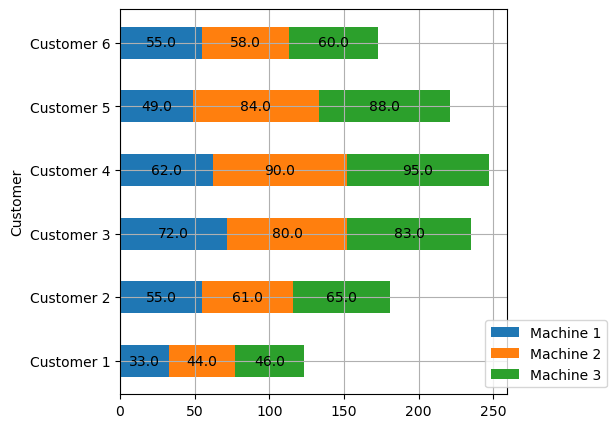

In [49]:
plt.figure(figsize = (5, 5))

stack = 0

for machine in machines:
    bar_width = df[machine].values.tolist()
    bars = plt.barh(df['Customer'], df[machine], left = stack, label = machine, height = 0.5)
    stack += df[machine]
    
    for bar, width in zip(bars, bar_width):
        x = bar.get_x() + bar.get_width() / 2  # Get the bar center x position
        y = bar.get_y() + bar.get_height() / 2  # Get the bar center y position
        ax = plt.gca()  # Get the current axes object
        ax.text(x, y, f"{width:.1f}", ha = 'center', va = 'center')  # Add text with formatting

plt.ylabel('Customer')
plt.grid(True)
plt.legend(bbox_to_anchor = (1.1, 0), loc = 'lower center')
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

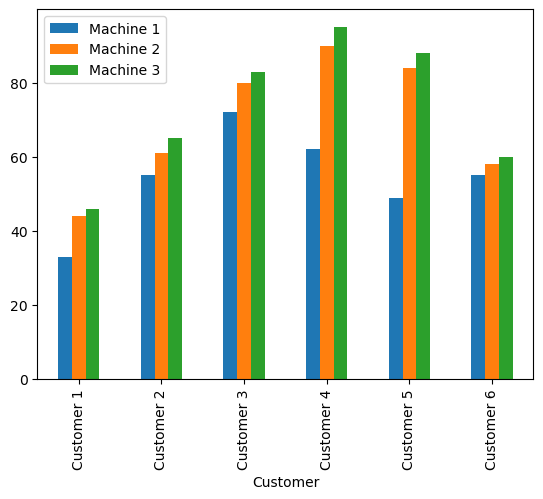

In [53]:
df.plot(kind = 'bar', x = 'Customer', stacked = False)

for i, value in enumerate(df[df.columns[1:]]):  # Loop through data columns (except 'Customer')
    x = i + 0.5  # Adjust x-position for centering (adjust as needed)
    y = value / 2  # Calculate y-position (half of the total value)
    plt.annotate(f"{value:.2f}", (x, y), ha='center', va='center', fontsize=8)

plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')

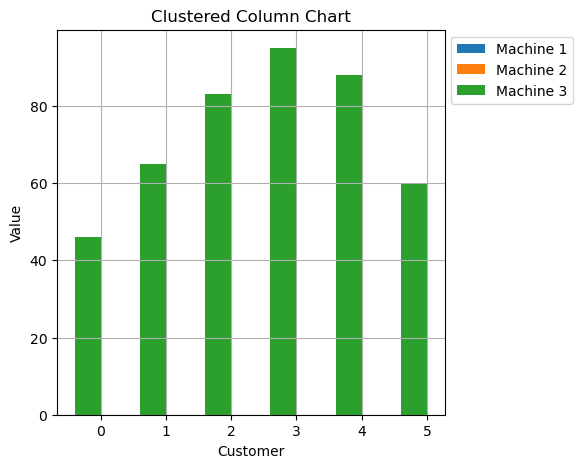

In [60]:
plt.figure(figsize = (5, 5))

# Get positions for each bar on the x-axis (adjusted slightly for clustering)
x = df['Customer'].tolist()
x_positions = [i - 0.2 for i in range(len(x))]  # Adjust offset for clustering

# Loop through data series (excluding 'Customer') and create bars
for i, col in enumerate(df.columns[1:]):  # Skip 'Customer' column
    bar = plt.bar(x_positions, df[col], label = col, width = 0.4)

plt.xlabel('Customer')
plt.ylabel('Value')
plt.title('Clustered Column Chart')

plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.grid(True)
plt.show()

# EOF